First we  take a look at the UFO dataset.

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
ufo_df = pd.read_csv("C:\\Users\\Servando\\Downloads\\UFOs_coord.csv")
ufo_df.head(5)

,Date / Time,Country,City,State,Shape,Summary,lat,lng
0,12/21/16 19:15,USA,Waynesboro,VA,Sphere,Bright round object hovering in sky.,38.065229,-78.905888
1,12/21/16 00:00,USA,Louisville,KY,Unknown,Multiple craft ascending from north of Shelbyv...,38.254238,-85.759407
2,12/20/16 22:30,USA,Santa Rosa,CA,Sphere,Bright orange planet-like object sighted near ...,38.440467,-122.714431
3,12/20/16 19:00,USA,Fresno,CA,Circle,Twelve orange globes in formation over Fresno,36.729529,-119.708861
4,12/19/16 21:53,USA,Reymert,AZ,Circle,"While camping in the Cottonwood canyon Rd., al...",33.229779,-111.209290


In [22]:
ufo_df["Date / Time"] = ufo_df["Date / Time"].astype('datetime64[ns]')
ufo_df["Sightings"] = 1
counts = ufo_df.groupby(ufo_df["Date / Time"].dt.month_name().str[:3]).sum("Sightings")
counts = counts.reset_index()
counts = counts.sort_values("Date / Time")
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

counts.index = pd.CategoricalIndex(counts["Date / Time"],
                                   categories = months,
                                   ordered = True)
counts = counts.sort_index()
del [counts["lat"],counts["lng"]]


Which months are the ones with the most UFO Sightings?

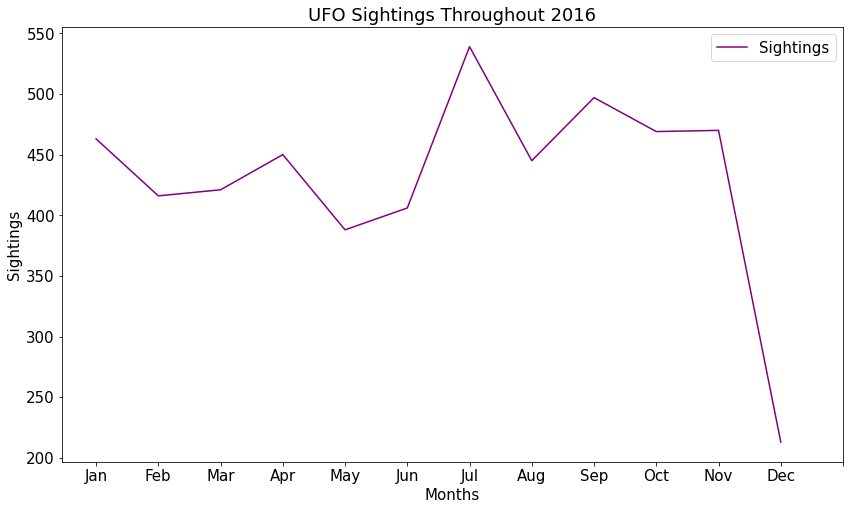

In [23]:
x = np.arange(0,13,1)
plt.rcParams.update({'font.size':15})
plt.rcParams['figure.figsize'] = [14,8]
counts.plot(kind = "line",
            color = "purple",
            title = "UFO Sightings Throughout 2016",
            xlabel = "Months",
            ylabel = "Sightings",
            xticks = x
           )
plt.show()

Time Series shows that most sightings occur during the summer, July being the month with most sightings. Activity decreases drastically in December.

In [24]:
cnt_byshape = ufo_df[["Shape","Sightings"]].groupby("Shape").sum("Sightings")
cnt_byshape = cnt_byshape.reset_index()
cnt_byshape = cnt_byshape.sort_values("Sightings", ascending = False)
top5_shapes = cnt_byshape.head(5)
print(top5_shapes)


       Shape  Sightings
13     Light       1118
3     Circle        678
19  Triangle        498
20   Unknown        431
10  Fireball        430


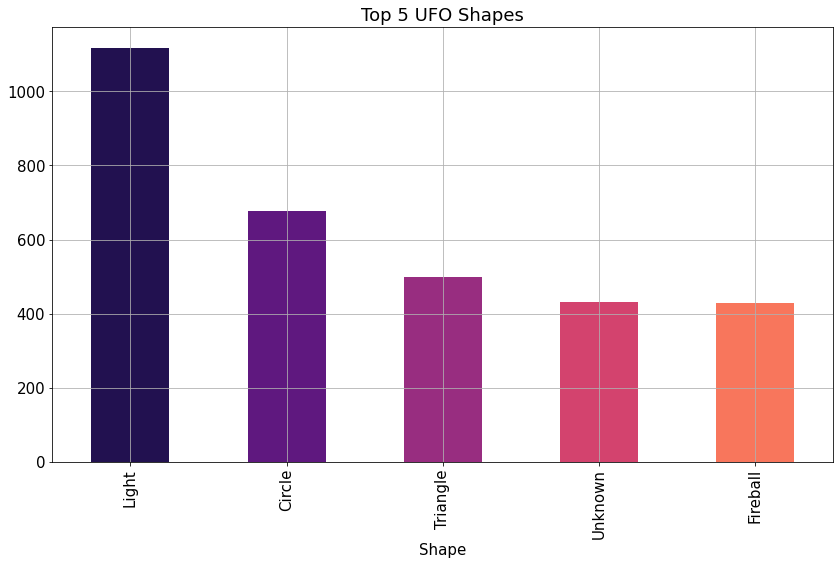

In [25]:
colors = sns.color_palette("magma")
plt.rcParams.update({'font.size':15})
top5_shapes.plot.bar(x = 'Shape',
                     y='Sightings',
                    title = "Top 5 UFO Shapes",
                    legend = False,
                    grid = True,
                     color = colors
                    )
plt.show()

Most UFOs are described as lights in the sky or as circles and triangles.

In [34]:
cnt_bycity =  ufo_df[["City","Sightings"]].groupby("City").sum("Sightings")
cnt_bycity = cnt_bycity.reset_index()
cnt_bycity = cnt_bycity.sort_values("Sightings", ascending = False)
top_5cities = cnt_bycity.head(5)
print(top_5cities)


              City  Sightings
1836       Phoenix         43
1893      Portland         28
1245     Las Vegas         24
1093  Jacksonville         21
2042     San Diego         20


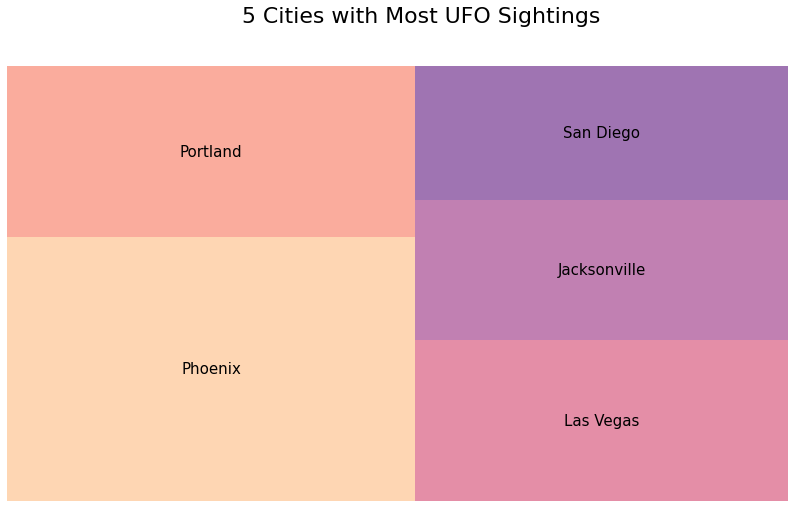

In [38]:
import squarify
colors = sns.color_palette("magma_r")
squarify.plot(sizes = top_5cities["Sightings"],
              label = top_5cities["City"],
              alpha = .6,
             color = colors
             )

plt.axis('off')
plt.text(30,110,"5 Cities with Most UFO Sightings",fontsize= 22)
plt.show()


Pheonix is the city with most UFO sightings.

At what time of the day do UFOs appear the most?

In [28]:
hours = ufo_df["Date / Time"].dt.hour
morning = [5,6,7,8,9,10,11]
afternoon = [12,13,14,15,16,17]
evening = [18,19,20,21]
idx = 0
n = len(hours)
ufo_df["Time of Day"] = np.zeros(n)
for hour in hours:
    if hour in morning:
        ufo_df["Time of Day"][idx] = "Morning"
    elif hour in afternoon:
        ufo_df["Time of Day"][idx] = "Afternoon"
    elif hour in evening:
        ufo_df["Time of Day"][idx] = "Evening"
    else:
        ufo_df["Time of Day"][idx] = "Night"
    idx +=1



C:\Users\Servando\AppData\Local\Temp/ipykernel_1876/933227518.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufo_df["Time of Day"][idx] = "Evening"
C:\Users\Servando\anaconda3\anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


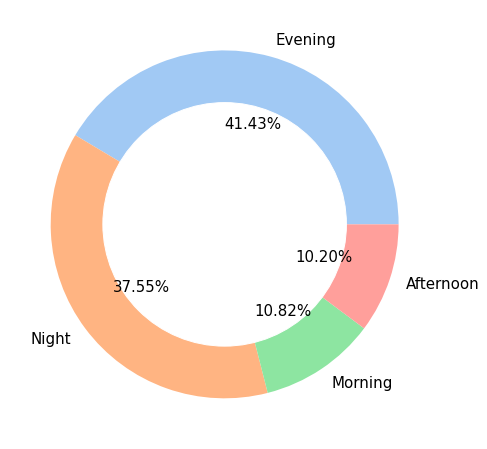

             Sightings
Time of Day           
Evening       0.414333
Night         0.375507
Morning       0.108171
Afternoon     0.101990


In [29]:
import seaborn as sns
palette =sns.color_palette("pastel")
cnt_bytime = ufo_df[["Time of Day","Sightings"]].groupby("Time of Day").sum("Sightings")
cnt_bytime = cnt_bytime.sort_values("Sightings", ascending = False)
group_size = cnt_bytime["Sightings"]
all_sightings = cnt_bytime["Sightings"].sum()
cnt_bytime["Sightings"] = cnt_bytime["Sightings"]/all_sightings
times = cnt_bytime.index

plt.pie(group_size , labels = times, colors =palette,
        autopct='%1.2f%%'
        )
circle=plt.Circle( (0,0), 0.7, color='white')
y = plt.gcf()
y.gca().add_artist(circle)
plt.show()
print(cnt_bytime)
